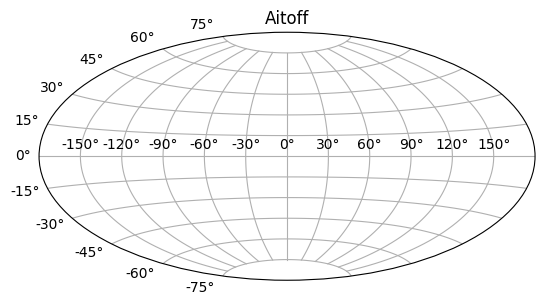

In [6]:
import matplotlib.pyplot as plt
plt.figure()
plt.subplot(111,projection="aitoff")
plt.title("Aitoff")
plt.grid(True)


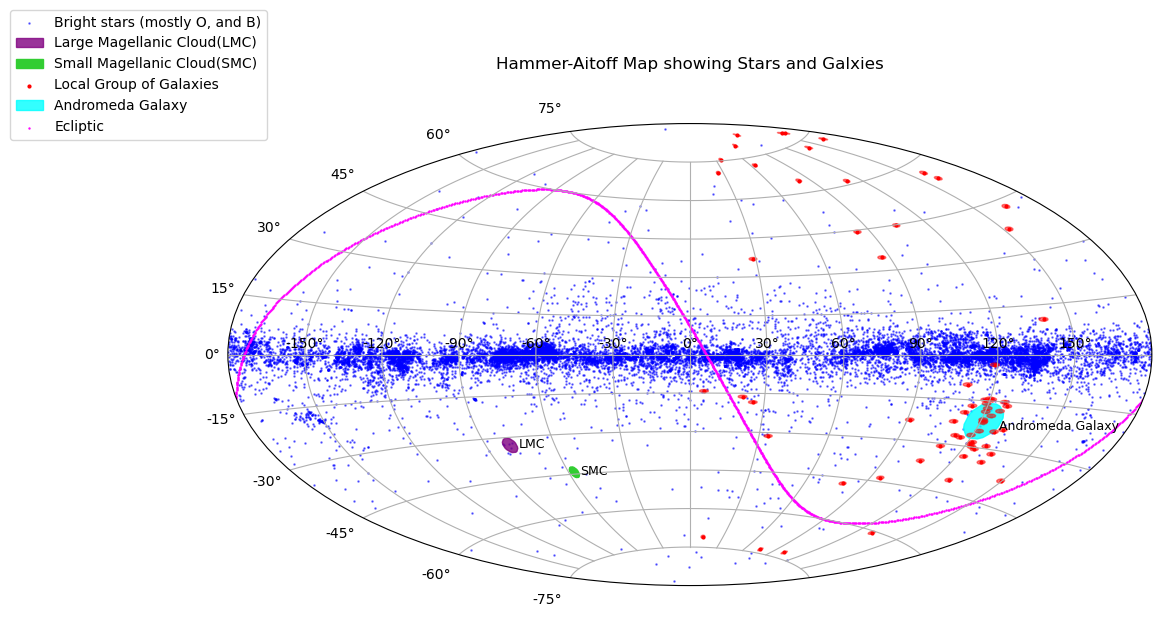

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from astropy.coordinates import SkyCoord
import astropy.units as u

# Extracting the necessary columns from the csv file which contains all the stellar data
data1 = pd.read_csv('obcat.csv', usecols=['GLONG', 'GLAT'])

# Extract Galactic longitude and latitude 
galactic_longitude = data1['GLONG']
galactic_latitude = data1['GLAT']

# Galactic coordinates for Large Megallenic Cloud
galactic_longitude_LMC = -79.534697
galactic_lattitude_LMC  = -32.888347

# Galactic coordinates for Small Megallenic Cloud
galactic_longitude_SMC = -57.203087
galactic_lattitude_SMC = -44.299213

# Galactic coordinates for Andromeda Galaxy
galactic_longitude_Andromeda_Galaxy = 121.174405
galactic_lattitude_Andromeda_Galaxy = -21.572936

# local.csv contains the data for the local group of galaxies
data2 = pd.read_csv('local.csv', usecols=['l', 'b'])

# Galactic coordinates for local group of galaxies
galactic_longitude_local = data2['l']
galactic_latitude_local = data2['b']

# Correct for Galactic longitudes greater than 180 degrees
for i in range(len(galactic_longitude)):
    if galactic_longitude[i] > 180:
        galactic_longitude[i] -= 360

#plotting the Ecliptic now
ecliptic = SkyCoord(np. linspace(0, 360, 1000), np.zeros(1000), unit = u.deg, frame ='barycentricmeanecliptic')
galactic_ecliptic = ecliptic.galactic

galactic_longitude_sun = galactic_ecliptic.l.radian
galactic_lattitude_sun = galactic_ecliptic.b.radian

# Correcting for Galactic longitudes greater than pi radians for the ecliptic
for i in range(len(galactic_longitude_sun)):
    if galactic_longitude_sun[i] > np.pi:
        galactic_longitude_sun[i] -= 2 * np.pi


# Setting up the Aitoff projection
plt.figure(figsize=(12, 6))
plt.subplot(111, projection="aitoff")
ax = plt.gca()

# Plot the Galactic coordinates of the celestial objects as a scatter plot
plt.scatter(galactic_longitude * 0.0174533, galactic_latitude * 0.0174533,  s=0.7, color='blue', alpha=0.5, label = 'Bright stars (mostly O, and B)')
ax.add_patch(patches.Ellipse((galactic_longitude_LMC * 0.0174533, galactic_lattitude_LMC * 0.0174533), width=0.1, height=0.09, angle=0, color='purple', alpha=0.8, label='Large Magellanic Cloud(LMC)'))
ax.add_patch(patches.Ellipse((galactic_longitude_SMC * 0.0174533, galactic_lattitude_SMC * 0.0174533), width=0.07, height=0.07, angle=0, color='limegreen', alpha=1, label='Small Magellanic Cloud(SMC)'))
plt.scatter(galactic_longitude_local * 0.0174533, galactic_latitude_local * 0.0174533,  s=4, color='red', alpha=1, label='Local Group of Galaxies')
ax.add_patch(patches.Ellipse((galactic_longitude_Andromeda_Galaxy * 0.0174533, galactic_lattitude_Andromeda_Galaxy * 0.0174533), width=0.25, height=0.2, angle=0, color='aqua', alpha=0.8, label='Andromeda Galaxy'))

for i in range(len(galactic_longitude_local)):
    ax.add_patch(patches.Ellipse((galactic_longitude_local[i] * 0.0174533, galactic_latitude_local[i] * 0.0174533), width=0.06, height=0.02, angle=0, color='red', alpha=0.5))

plt.text(galactic_longitude_LMC * 0.0174533 + 0.17, galactic_lattitude_LMC * 0.0174533 , 'LMC', fontsize=9, color='black', ha='center', va='center')
plt.text(galactic_longitude_SMC * 0.0174533 + 0.17, galactic_lattitude_SMC * 0.0174533, 'SMC', fontsize=9, color='black', ha='center', va='center')
plt.text(galactic_longitude_Andromeda_Galaxy * 0.0174533+0.55, galactic_lattitude_Andromeda_Galaxy * 0.0174533 + 0.015, 'Andromeda Galaxy', fontsize=9, color='black', ha='center', va='center')

# Plot the ecliptic as a continuous line with adjusted thickness
plt.scatter(galactic_longitude_sun, galactic_lattitude_sun, color='magenta', alpha=1,s=0.5, label='Ecliptic')

# Customizing the plot
plt.title("Hammer-Aitoff Map showing Stars and Galxies", y=1.1)
plt.grid(True)
plt.legend(loc='lower right', bbox_to_anchor=(0.05, 0.95))

# Displaying the plot
plt.show()


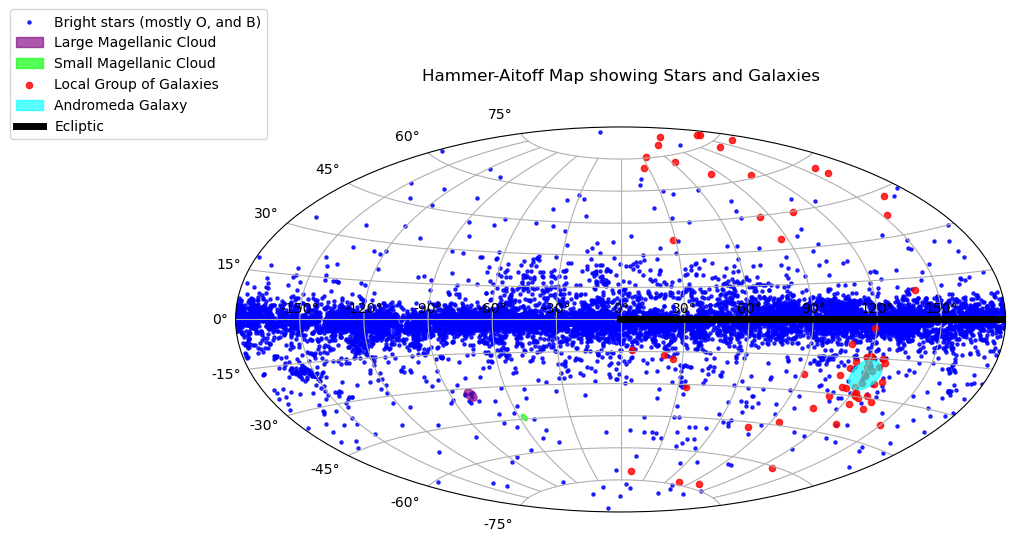

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Read specific columns from the CSV file into DataFrames
data1 = pd.read_csv('obcat.csv', usecols=['GLONG', 'GLAT'])

# Extract Galactic longitude and latitude from the DataFrame
galactic_longitude = data1['GLONG']
galactic_latitude = data1['GLAT']

galactic_longitude_LMC = -79.534697
galactic_lattitude_LMC = -32.888347

galactic_longitude_SMC = -57.203087
galactic_lattitude_SMC = -44.299213

galactic_longitude_Andromeda_Galaxy = 121.174405
galactic_lattitude_Andromeda_Galaxy = -21.572936

data2 = pd.read_csv('local.csv', usecols=['l', 'b'])

galactic_longitude_local = data2['l']
galactic_latitude_local = data2['b']

# Correct for Galactic longitudes greater than 180 degrees
galactic_longitude = np.where(galactic_longitude > 180, galactic_longitude - 360, galactic_longitude)

# Define an array for ecliptic coordinates
ecliptic_l = np.linspace(0, 360, 100)
ecliptic_b = np.zeros_like(ecliptic_l)  # Ecliptic latitude is 0

# Create a figure and set up the Aitoff projection
plt.figure(figsize=(10, 5))
plt.subplot(111, projection="aitoff")
ax = plt.gca()

# Plot the Galactic coordinates as a scatter plot
plt.scatter(np.radians(galactic_longitude), np.radians(galactic_latitude), s=5, color='blue', alpha=0.8, label='Bright stars (mostly O, and B)')
ax.add_patch(patches.Ellipse((np.radians(galactic_longitude_LMC), np.radians(galactic_lattitude_LMC)), width=0.1, height=0.09, angle=0, color='purple', alpha=0.65, label='Large Magellanic Cloud'))
ax.add_patch(patches.Ellipse((np.radians(galactic_longitude_SMC), np.radians(galactic_lattitude_SMC)), width=0.05, height=0.05, angle=0, color='lime', alpha=0.65, label='Small Magellanic Cloud'))
plt.scatter(np.radians(galactic_longitude_local), np.radians(galactic_latitude_local), s=20, color='red', alpha=0.8, label='Local Group of Galaxies')
ax.add_patch(patches.Ellipse((np.radians(galactic_longitude_Andromeda_Galaxy), np.radians(galactic_lattitude_Andromeda_Galaxy)), width=0.25, height=0.2, angle=0, color='aqua', alpha=0.65, label='Andromeda Galaxy'))

# Plot ecliptic
plt.plot(np.radians(ecliptic_l), np.radians(ecliptic_b), color='black', linewidth=5, label='Ecliptic')

# Customize the plot
plt.title("Hammer-Aitoff Map showing Stars and Galaxies", y=1.1)
plt.grid(True)
plt.legend(loc='lower right', bbox_to_anchor=(0.05, 0.95))

# Show the plot
plt.show()


In [26]:
import numpy as np
from astropy.coordinates import get_sun
from astropy.time import Time
import astropy.units as u

# Define an array of dates covering the entire year
dates = Time(np.linspace(0, 365, 366), format='jd')

# Calculate the Sun's coordinates (RA, DEC) for each date
sun_coords = get_sun(dates)

# Extract the Sun's RA and DEC values
sun_ra = sun_coords.ra.deg
sun_dec = sun_coords.dec.deg

# Find the minimum and maximum values of RA and DEC
min_ra = np.min(sun_ra)
max_ra = np.max(sun_ra)
min_dec = np.min(sun_dec)
max_dec = np.max(sun_dec)

# Print the range of values
print("Sun's Right Ascension (RA) range (degrees):", min_ra, "to", max_ra)
print("Sun's Declination (DEC) range (degrees):", min_dec, "to", max_dec)
print(date)



Sun's Right Ascension (RA) range (degrees): 0.2315410107573011 to 359.3388328181875
Sun's Declination (DEC) range (degrees): -24.37191274896836 to 24.38032327584087
<SkyCoord (GCRS: obstime=[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159

/opt/homebrew/anaconda3/lib/python3.10/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 366 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/opt/homebrew/anaconda3/lib/python3.10/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 366 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/opt/homebrew/anaconda3/lib/python3.10/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "epv00" yielded 366 of "warning: date outsidethe range 1900-2100 AD"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


/opt/homebrew/anaconda3/lib/python3.10/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 366 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/opt/homebrew/anaconda3/lib/python3.10/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 366 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/opt/homebrew/anaconda3/lib/python3.10/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "epv00" yielded 366 of "warning: date outsidethe range 1900-2100 AD"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


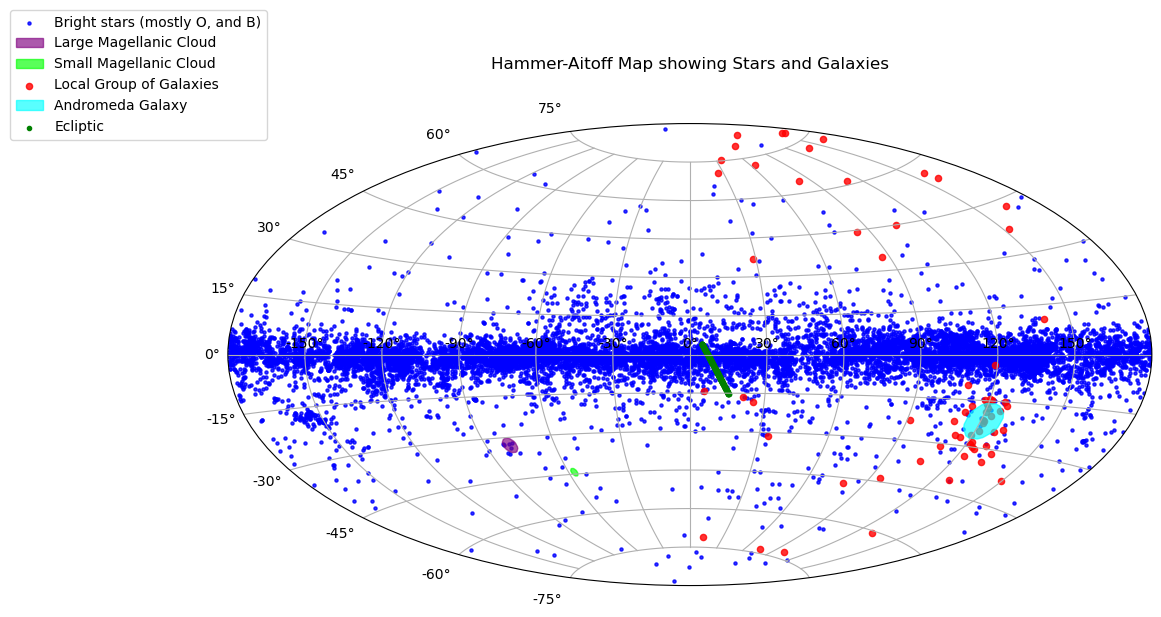

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from astropy.coordinates import get_sun
from astropy.time import Time
import astropy.units as u

# Read specific columns from the CSV file into DataFrames
data1 = pd.read_csv('obcat.csv', usecols=['GLONG', 'GLAT'])

# Extract Galactic longitude and latitude from the DataFrame
galactic_longitude = data1['GLONG']
galactic_latitude = data1['GLAT']

galactic_longitude_LMC = -79.534697
galactic_lattitude_LMC = -32.888347

galactic_longitude_SMC = -57.203087
galactic_lattitude_SMC = -44.299213

galactic_longitude_Andromeda_Galaxy = 121.174405
galactic_lattitude_Andromeda_Galaxy = -21.572936

data2 = pd.read_csv('local.csv', usecols=['l', 'b'])

galactic_longitude_local = data2['l']
galactic_latitude_local = data2['b']

# Correct for Galactic longitudes greater than 180 degrees
galactic_longitude = np.where(galactic_longitude > 180, galactic_longitude - 360, galactic_longitude)

# Define an array of dates covering the entire year
dates = Time(np.linspace(0, 365, 366), format='jd')

# Calculate the Sun's coordinates (RA, DEC) for each date
sun_coords = get_sun(dates)

# Convert the Sun's coordinates to Galactic coordinates
galactic_coords_sun = sun_coords.transform_to('galactic')

# Extract the Galactic longitude and latitude
galactic_longitude_sun = galactic_coords_sun.l.degree
galactic_latitude_sun = galactic_coords_sun.b.degree

# Correct for Galactic longitudes greater than 180 degrees
galactic_longitude_sun = np.where(galactic_longitude_sun > 180, galactic_longitude_sun - 360, galactic_longitude_sun)

# Create a figure and set up the Aitoff projection
plt.figure(figsize=(12, 6))
plt.subplot(111, projection="aitoff")
ax = plt.gca()

# Plot the Galactic coordinates as a scatter plot
plt.scatter(np.radians(galactic_longitude), np.radians(galactic_latitude), s=5, color='blue', alpha=0.8, label='Bright stars (mostly O, and B)')
ax.add_patch(patches.Ellipse((np.radians(galactic_longitude_LMC), np.radians(galactic_lattitude_LMC)), width=0.1, height=0.09, angle=0, color='purple', alpha=0.65, label='Large Magellanic Cloud'))
ax.add_patch(patches.Ellipse((np.radians(galactic_longitude_SMC), np.radians(galactic_lattitude_SMC)), width=0.05, height=0.05, angle=0, color='lime', alpha=0.65, label='Small Magellanic Cloud'))
plt.scatter(np.radians(galactic_longitude_local), np.radians(galactic_latitude_local), s=20, color='red', alpha=0.8, label='Local Group of Galaxies')
ax.add_patch(patches.Ellipse((np.radians(galactic_longitude_Andromeda_Galaxy), np.radians(galactic_lattitude_Andromeda_Galaxy)), width=0.25, height=0.2, angle=0, color='aqua', alpha=0.65, label='Andromeda Galaxy'))

# Plot the ecliptic as a scatter plot
plt.scatter(np.radians(galactic_longitude_sun), np.radians(galactic_latitude_sun), color='green', marker='.', label='Ecliptic')

# Customize the plot
plt.title("Hammer-Aitoff Map showing Stars and Galaxies", y=1.1)
plt.grid(True)
plt.legend(loc='lower right', bbox_to_anchor=(0.05, 0.95))

# Show the plot
plt.show()
